# Anchor ⚓️ 

Your observation offers a fascinating glimpse into the predictable patterns of high-altitude air traffic, and there are some likely explanations for the contrails you're consistently seeing. Let’s analyze the geography and air traffic routes:

---

```{figure} https://www.science.org/do/10.1126/science.aay5598/full/1127588194-1280x720-1644914646830.jpg
---
width: 100%
height: 100%
---
_[Aviation's dirty secret](https://www.science.org/content/article/aviation-s-dirty-secret-airplane-contrails-are-surprisingly-potent-cause-global-warming)_. Airplane contrails are a surprisingly potent cause of global warming. Warming effect of thin, white clouds will triple by 2050
```

### **The Orientation and Likely Route**
1. **Baltimore's Position Relative to Flight Paths**:  
   Baltimore sits close to some of the busiest air corridors in the U.S. Northeastern cities like New York, Boston, and Philadelphia generate a high volume of air traffic, and these planes often head toward southern or western destinations, crossing over Maryland.  

2. **Southwest Trajectory**:  
   If the contrails are consistently crossing East 33rd Street from a northeast-to-southwest direction, the planes could be originating from airports northeast of Baltimore and headed toward destinations in the southern or southwestern U.S. Some possibilities:
   - **Origins**:  
     Likely airports include:
       - John F. Kennedy International (JFK) in New York.
       - Boston Logan International (BOS).
       - Newark Liberty International (EWR).
       - Philadelphia International (PHL).  

   - **Destinations**:  
     Common destinations for southwest-bound flights include:
       - Atlanta Hartsfield-Jackson (ATL), the busiest airport in the world.
       - Miami International (MIA).
       - Dallas/Fort Worth International (DFW).
       - Houston Intercontinental (IAH).
       - Charlotte Douglas International (CLT), a major hub for American Airlines.  

3. **Altitude (30,000 Feet)**:  
   Planes cruising at 30,000 feet are typically mid-journey, so they are likely passing over Baltimore after reaching their cruising altitude (from airports in the northeast) and before descending into their destination airports farther south or southwest.

---

### **Airways and Flight Corridors**
Airlines and pilots follow designated airways akin to highways in the sky. These routes are determined by:
   - **Navigation aids (VORs)**: Fixed points on the ground used for navigation.
   - **Wind conditions**: Jet streams can make southwest-bound routes more efficient.
   - **Air traffic control coordination**: Balancing density over busy areas like the Northeast Corridor.  

One common airway in your area is **J75**, a major east-west airway that stretches from Boston through the mid-Atlantic and on toward the southern U.S. The flights you observe may be using this or similar airways. 

---

### **Conclusion**  
The contrails you see are likely flights originating from northeastern hubs (JFK, BOS, EWR, or PHL) heading toward major southern or southwestern destinations like ATL, CLT, DFW, or MIA. The southwest crossing pattern over East 33rd Street aligns with standard airways and traffic patterns in the region. If you’re curious to pinpoint specific flights, tools like **FlightRadar24** or **FlightAware** can provide real-time tracking and help you identify exact routes, aircraft types, and destinations.

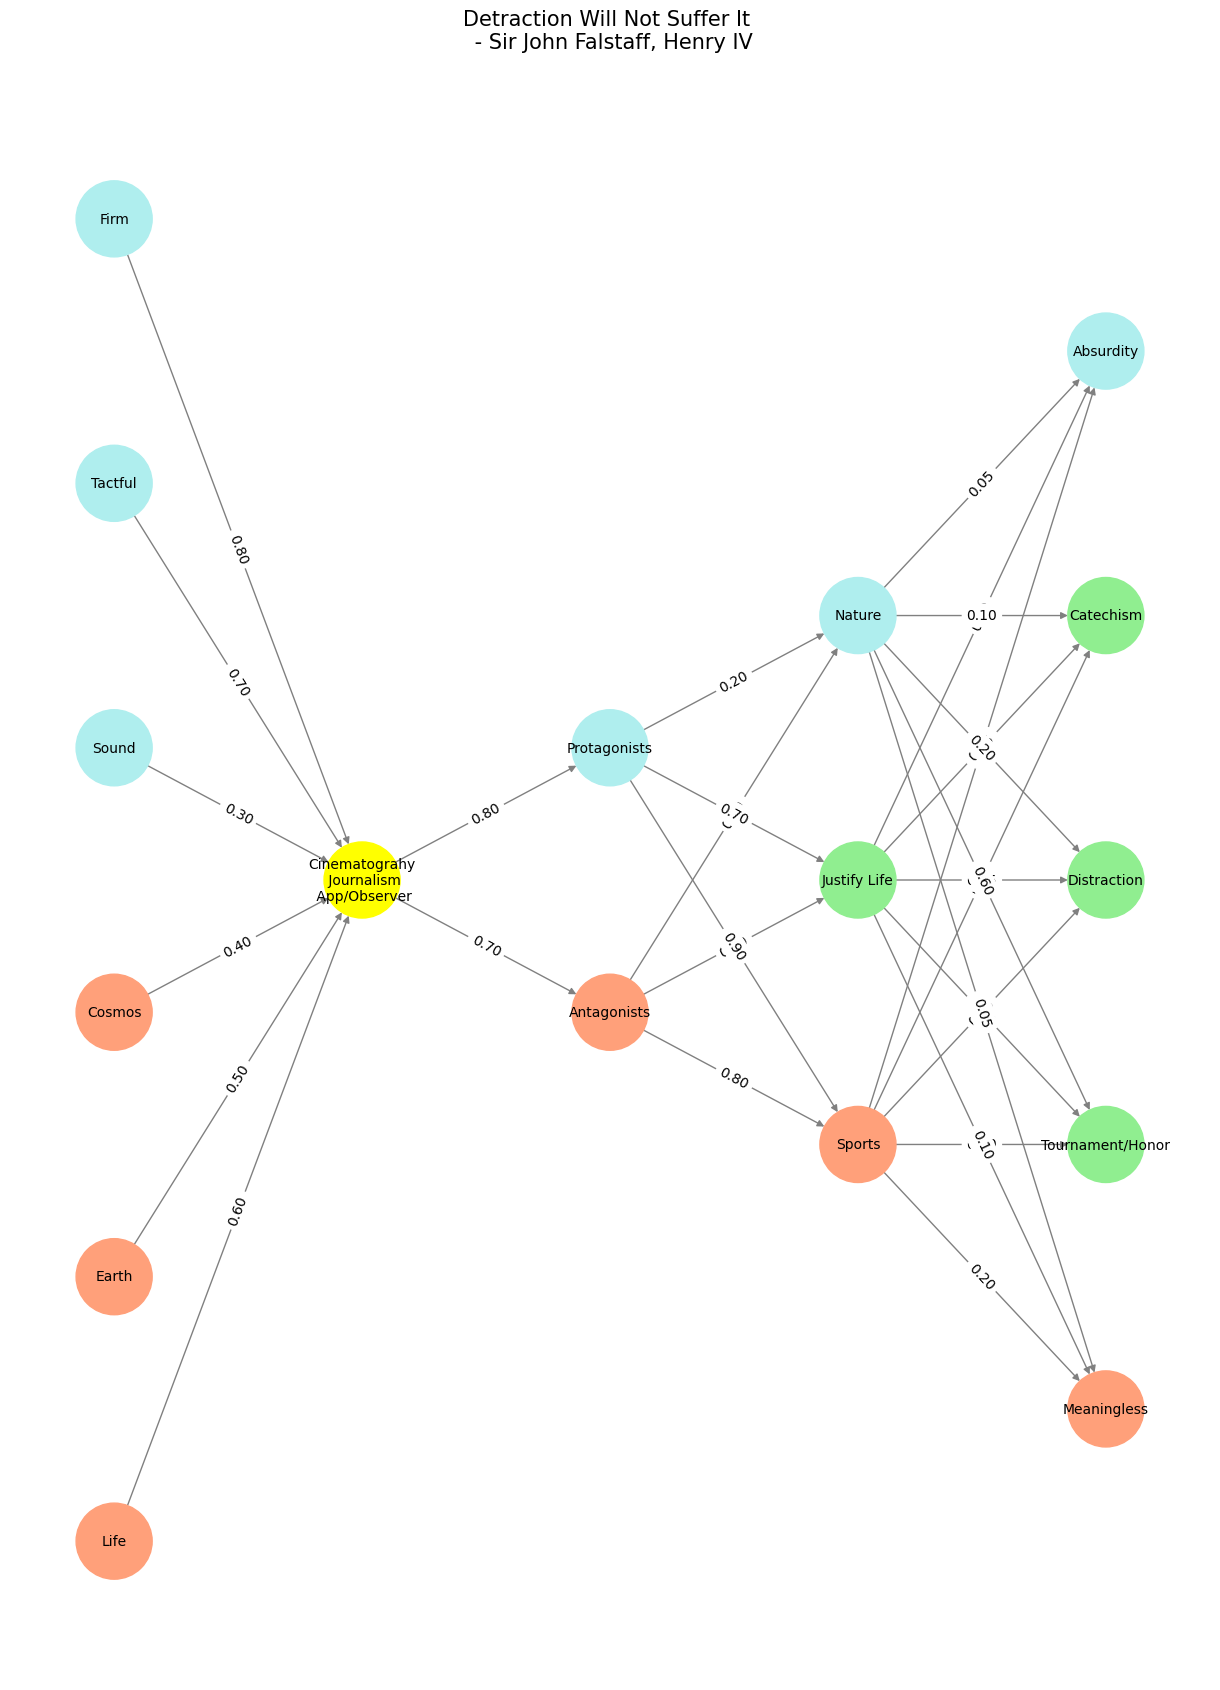

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
def define_layers():
    return {
        'Pre-Input': ['Life','Earth', 'Cosmos', 'Sound', 'Tactful', 'Firm', ],
        'Yellowstone': ['Cinematograhy\n Journalism\n App/Observer'],
        'Input': ['Antagonists', 'Protagonists'],
        'Hidden': [
            'Sports',
            'Justify Life',
            'Nature',
        ],
        'Output': ['Meaningless', 'Tournament/Honor', 'Distraction', 'Catechism', 'Absurdity',    ]
    }

# Define weights for the connections
def define_weights():
    return {
        'Pre-Input-Yellowstone': np.array([
            [0.6],
            [0.5],
            [0.4],
            [0.3],
            [0.7],
            [0.8],
            [0.6]
        ]),
        'Yellowstone-Input': np.array([
            [0.7, 0.8]
        ]),
        'Input-Hidden': np.array([[0.8, 0.4, 0.1], [0.9, 0.7, 0.2]]),
        'Hidden-Output': np.array([
            [0.2, 0.8, 0.1, 0.05, 0.2],
            [0.1, 0.9, 0.05, 0.05, 0.1],
            [0.05, 0.6, 0.2, 0.1, 0.05]
        ])
    }

# Assign colors to nodes
def assign_colors(node, layer):
    if node == 'Cinematograhy\n Journalism\n App/Observer':
        return 'yellow'
    if layer == 'Pre-Input' and node in ['Sound', 'Tactful', 'Firm']:
        return 'paleturquoise'
    elif layer == 'Input' and node == 'Protagonists':
        return 'paleturquoise'
    elif layer == 'Hidden':
        if node == 'Nature':
            return 'paleturquoise'
        elif node == 'Justify Life':
            return 'lightgreen'
        elif node == 'Sports':
            return 'lightsalmon'
    elif layer == 'Output':
        if node == 'Absurdity':
            return 'paleturquoise'
        elif node in ['Catechism', 'Distraction', 'Tournament/Honor']:
            return 'lightgreen'
        elif node == 'Meaningless':
            return 'lightsalmon'
    return 'lightsalmon'  # Default color

# Calculate positions for nodes
def calculate_positions(layer, center_x, offset):
    layer_size = len(layer)
    start_y = -(layer_size - 1) / 2  # Center the layer vertically
    return [(center_x + offset, start_y + i) for i in range(layer_size)]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    weights = define_weights()
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    center_x = 0  # Align nodes horizontally

    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        y_positions = calculate_positions(nodes, center_x, offset=-len(layers) + i + 1)
        for node, position in zip(nodes, y_positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(assign_colors(node, layer_name))

    # Add edges and weights
    for layer_pair, weight_matrix in zip(
        [('Pre-Input', 'Yellowstone'), ('Yellowstone', 'Input'), ('Input', 'Hidden'), ('Hidden', 'Output')],
        [weights['Pre-Input-Yellowstone'], weights['Yellowstone-Input'], weights['Input-Hidden'], weights['Hidden-Output']]
    ):
        source_layer, target_layer = layer_pair
        for i, source in enumerate(layers[source_layer]):
            for j, target in enumerate(layers[target_layer]):
                weight = weight_matrix[i, j]
                G.add_edge(source, target, weight=weight)

    # Customize edge thickness for specific relationships
    edge_widths = []
    for u, v in G.edges():
        if u in layers['Hidden'] and v == 'Kapital':
            edge_widths.append(6)  # Highlight key edges
        else:
            edge_widths.append(1)

    # Draw the graph
    plt.figure(figsize=(12, 16))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=10, width=edge_widths
    )
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in edge_labels.items()})
    plt.title("Detraction Will Not Suffer It \n - Sir John Falstaff, Henry IV\n", fontsize=15)
    
    # Save the figure to a file
    # plt.savefig("figures/logo.png", format="png")

    plt.show()

# Run the visualization
visualize_nn()